In [1]:
#Data pre-processing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing the dataset
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
#Separating the dataset
X=df.iloc[:,3:13]  #Independent features
Y=df.iloc[:,13]    #Dependent features

In [4]:
#Create dummy variables
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [5]:
#Concatenate the dataframes
X=pd.concat([X,geography,gender],axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [6]:
#Dropping unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [7]:
#Converting the data to numpy array
X=np.asarray(X)
Y=np.asarray(Y)

In [8]:
#Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [10]:
#Importing Kears libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout

In [11]:
seq=Sequential()

In [12]:
#Adding i/p layer and 1st hidden layer
seq.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))
#Adding dropout layer
#seq.add(Dropout(0.3))   #this is optional

#Adding second hidden layer
seq.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))
#Adding dropout layer
#seq.add(Dropout(0.4))
 
#Adding o/p layer
seq.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid')) 
#Adding dropout layer
#seq.add(Dropout(0.2))

In [13]:
seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Compiling ANN
seq.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
#Fitting the ANN to training set
model_history=seq.fit(X_train, Y_train, validation_split=0.33, batch_size=10, epochs=100)

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 336us/sample - loss: 0.5541 - accuracy: 0.7714 - val_loss: 0.5041 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 142us/sample - loss: 0.4789 - accuracy: 0.7960 - val_loss: 0.4685 - val_accuracy: 0.7959
Epoch 3/100
5359/5359 [==============================] - 1s 144us/sample - loss: 0.4498 - accuracy: 0.8005 - val_loss: 0.4506 - val_accuracy: 0.8046
Epoch 4/100
5359/5359 [==============================] - 1s 144us/sample - loss: 0.4359 - accuracy: 0.8112 - val_loss: 0.4398 - val_accuracy: 0.8076
Epoch 5/100
5359/5359 [==============================] - 1s 151us/sample - loss: 0.4268 - accuracy: 0.8181 - val_loss: 0.4321 - val_accuracy: 0.8118
Epoch 6/100
5359/5359 [==============================] - 1s 147us/sample - loss: 0.4195 - accuracy: 0.8218 - val_loss: 0.4254 - val_accuracy: 0.8145
Epoch 7/100
5359/5359 [==============================] - 1

5359/5359 [==============================] - 1s 142us/sample - loss: 0.3286 - accuracy: 0.8670 - val_loss: 0.3645 - val_accuracy: 0.8508
Epoch 56/100
5359/5359 [==============================] - 1s 134us/sample - loss: 0.3288 - accuracy: 0.8645 - val_loss: 0.3648 - val_accuracy: 0.8512
Epoch 57/100
5359/5359 [==============================] - 1s 132us/sample - loss: 0.3286 - accuracy: 0.8664 - val_loss: 0.3634 - val_accuracy: 0.8531
Epoch 58/100
5359/5359 [==============================] - 1s 133us/sample - loss: 0.3286 - accuracy: 0.8655 - val_loss: 0.3639 - val_accuracy: 0.8519
Epoch 59/100
5359/5359 [==============================] - 1s 134us/sample - loss: 0.3286 - accuracy: 0.8664 - val_loss: 0.3651 - val_accuracy: 0.8535
Epoch 60/100
5359/5359 [==============================] - 1s 133us/sample - loss: 0.3285 - accuracy: 0.8653 - val_loss: 0.3645 - val_accuracy: 0.8527
Epoch 61/100
5359/5359 [==============================] - 1s 132us/sample - loss: 0.3286 - accuracy: 0.8664 - val

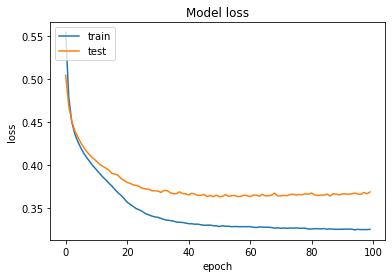

In [16]:
#Summarize the history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [17]:
#Predicting the test set results
y_pred=seq.predict(X_test)
y_pred=(y_pred>0.5)

In [18]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)

In [19]:
cm

array([[1517,   78],
       [ 207,  198]], dtype=int64)

In [20]:
#Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)
score

0.8575